## Hough Transform (Edge detection)

In [244]:
# Import libraries
import matplotlib.pyplot as plt 
import numpy as np
import cv2
from numba import jit

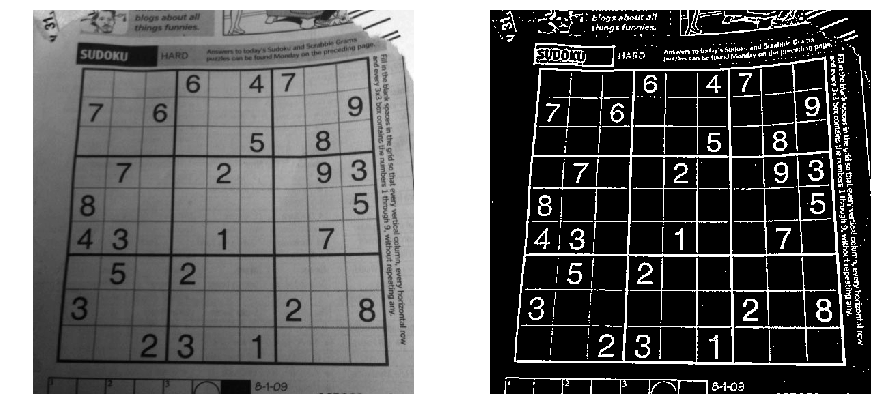

In [245]:
image = cv2.imread('images/sudoku.jpg')
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
binary = cv2.adaptiveThreshold(image_gray,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY_INV,11,7)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(121)
ax1.imshow(image_gray, cmap='gray')
ax2 = plt.subplot(122)
ax2.imshow(binary, cmap='gray')

ax1.axis('off')
ax2.axis('off')

plt.show()

In [246]:
@jit
def edge_detection(image, theta=90, threshold=.5):
    h,w = image.shape
    diagonal = np.ceil( np.sqrt( h*h + w*w ) )
    
    # Defining ranges
    thetas = np.deg2rad(np.arange(-theta, theta))
    rhos = np.linspace(-diagonal, diagonal, 2*diagonal)
    n_thetas = len(thetas)
    n_rhos = len(rhos)
    
    # Computing cosines and sines
    cos = np.cos(thetas)
    sin = np.sin(thetas)
    
    # Accumulator matrix
    M = np.zeros((n_rhos, n_thetas), dtype=np.float)
    
    # Get non-background values
    rows, cols = np.nonzero(image)
    
    for (r,c) in zip(rows, cols):
        for idx in range(len(thetas)):
            rho = round( c * cos[idx] + r * sin[idx]) + diagonal
            M[int(rho), int(idx)] += 1
    
    min_v = np.min(M)
    max_v = np.max(M)
    
    M = (M - min_v) / (( max_v - min_v ) * 1.0)
    
    min_v = np.min(M)
    max_v = np.max(M)
    
    rhos_thetas = []
    for row in range(M.shape[0]):
        for col in range(M.shape[1]):
            if M[row,col] >= threshold:
                rhos_thetas.append( (rhos[row],thetas[col]) )
    
    return rhos_thetas

@jit
def draw_lines(img, lines):
    result = img.copy()
    h,w = img.shape[:2]
    for (rho, theta) in lines:
        cos = np.cos(theta)
        sin = np.sin(theta)
        
        m = -(cos / sin)
        b = rho / sin
        if sin == 0:
            b = 0
            m = 0
        
        x1 = 0
        x2 = w-1
        
        y1 = int(b)
        y2 = int(m*x2 + b)
        
        cv2.line(result,(x1,y1),(x2,y2),(0,0,255),1)
    return result

In [247]:
lines = edge_detection(binary)

/home/vinihcampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  """Entry point for launching an IPython kernel.


/home/vinihcampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:1: RuntimeWarning: divide by zero encountered in double_scalars
  """Entry point for launching an IPython kernel.


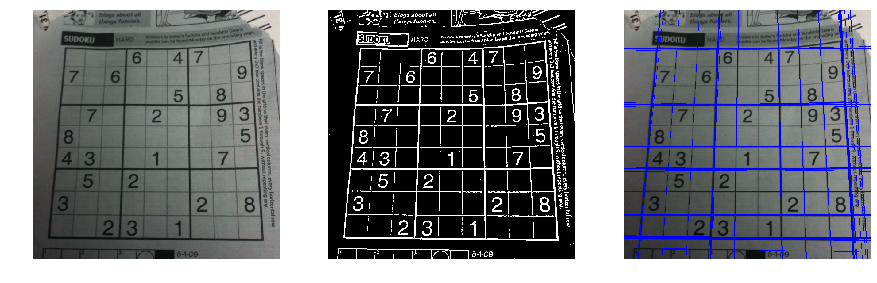

In [248]:
result = draw_lines(image, lines)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(131)
ax1.imshow(image, cmap='gray')
ax2 = plt.subplot(132)
ax2.imshow(binary, cmap='gray')
ax3 = plt.subplot(133)
ax3.imshow(result)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()

/home/vinihcampos/miniconda3/envs/dip/lib/python3.7/site-packages/ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'numpy.float64'> cannot be safely interpreted as an integer.
  


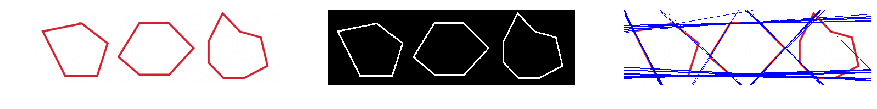

In [243]:
image = cv2.imread('images/polygons.png')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
image_gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
_, binary = cv2.threshold(image_gray, 110, 255,cv2.THRESH_BINARY_INV)
#binary = cv2.medianBlur(binary, 3)
lines = edge_detection(binary, threshold=.5)
result = draw_lines(image, lines)

plt.figure(figsize=(15,10))
ax1 = plt.subplot(131)
ax1.imshow(image, cmap='gray')
ax2 = plt.subplot(132)
ax2.imshow(binary, cmap='gray')
ax3 = plt.subplot(133)
ax3.imshow(result)

ax1.axis('off')
ax2.axis('off')
ax3.axis('off')

plt.show()